Are you a star wars fan? If not, this exercise will help you learn about one of the most important character of the saga: Obi-Wan Kenobi. We will scrap a wikipedia page and create a word cloud to understand what comes out of the article.

To focus on NLP, let's use the following code to retrieve a clean HTML page from a variable. We will see later in the program how it works:

In [2]:
import pandas as pd
import numpy as np
import requests
import re
import fr_core_news_sm
from bs4 import BeautifulSoup

import spacy
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop
from spacy import displacy

import wordcloud
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import plotly.express as px

from PIL import Image

from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
# Requête vers la page Wikipédia
url = "https://fr.wikipedia.org/wiki/Obi-Wan_Kenobi"
response = requests.get(url)

# Vérifier si la requête a réussi
if response.status_code == 200:
    # Analyse HTML
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Extraire tous les paragraphes dans un corpus
    corpus = [p.text for p in soup.find_all("p")]
    
    # Afficher le premier paragraphe
    print("Premier paragraphe extrait :\n")
    print(corpus[0] if corpus else "Aucun contenu trouvé.")
else:
    print(f"Erreur lors de la requête : {response.status_code}")

Premier paragraphe extrait :

Pour les articles homonymes, voir Obi-Wan Kenobi (homonymie).



We need to install spacy modules corresponding to the language specifics (in this case French). So install en_core_news_sm.

Feel free to help you with documentation: English

Since text is in french, import now fr_core_news_sm --> Documentation

In [4]:
# Charger le modèle de langue francaise
nlp = spacy.load("fr_core_news_sm")

For the rest, we need to create a complete corpus of text in a variable. This is a best-practice in the use of spacy. So you will need to create a clean corpus of text. You can do this with the help of :

join()

strip()

Make some basic cleanings :

remove special characters

make sure there are no uppercase

In [5]:
# Supprimer les espaces superflus dans chaque paragraphe
stripped_corpus = [text.strip() for text in corpus]

# Fusionner tous les paragraphes en une seule chaîne
clean_corpus = " ".join(stripped_corpus)

# Supprimer la ponctuation et convertir en minuscules
clean_corpus = re.sub(r"[!\"#$%&()*+,-./:;<=>?@[\\\]^_`{|}~]+", "", clean_corpus).lower()

# Afficher les 100 premiers caractères
print(f"{clean_corpus[:100]}...")

pour les articles homonymes voir obiwan kenobi homonymie personnage de fiction apparaissant dansstar...


Now load your clean corpus in a doc object.

In [6]:
doc = nlp(clean_corpus)

In [7]:
# Print stop words
print(fr_stop)

{'différentes', 'cette', 'dix-sept', 'basee', 'apres', 'debout', 'stop', 'de', 'differente', 'moindres', 'auront', 'té', 'voilà', 'autrui', 'cinq', 'relativement', 'bat', 'd’', 'cependant', 'onzième', 'soi-même', 'nos', 'vais', 'parle', 'nôtres', 'quant', 'environ', 'malgre', 'pense', 'désormais', 'ouverts', 'semblaient', 'proche', 'encore', 'elles-mêmes', 'restant', 'treize', 'lès', 'via', 'certaine', 'vont', 'lesquels', 'anterieure', 'dix', 'or', 'quatrième', 'egalement', 'moi-même', 'celle-ci', 'tien', 'est', 'ton', 'celles', 'miennes', 'plusieurs', 'moi', 'seize', 'celles-ci', 'quelques', 'juste', 'etant', 'devant', 'trente', 'toujours', 'antérieure', 'déjà', 'sinon', 'celui', "n'", 'nous-mêmes', 'nul', 'parfois', 'ouste', 'devra', 'tend', 'ça', 'serait', 'qu’', 'peux', 'dix-neuf', 'delà', 'sur', 'cet', "qu'", 'chacun', 'hui', 'laisser', 'septième', 'te', 'facon', 'mais', 'dits', 'ni', 'moi-meme', 'quinze', 'première', 'i', 'desquelles', 'se', 'ai', 'anterieur', 'ils', 'siens', 'ch

With the wordcloud library, create a first word cloud

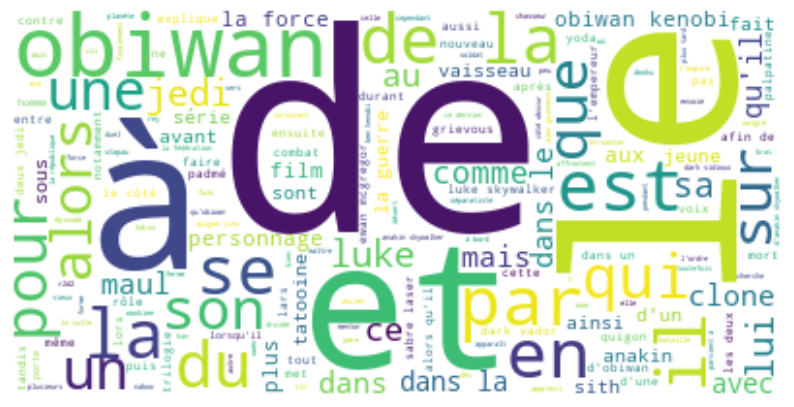

In [8]:
# Instancier le WordCloud avec les paramètres
wd = WordCloud(
    background_color="white",     # Couleur de fond
    contour_width=1,              # Largeur du contour
    contour_color="steelblue",    # Couleur du contour
)

# Générer le WordCloud
cloud = wd.generate(doc.text)

# Afficher le WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")  # Supprimer les axes
plt.show()

In [9]:
# Visualiser les 10 premiers mots
print("Les 10 premiers mots vides en français :")
for i, word in enumerate(fr_stop):
    if i < 10:
        print(word)
    else:
        break

Les 10 premiers mots vides en français :
différentes
cette
dix-sept
basee
apres
debout
stop
de
differente
moindres


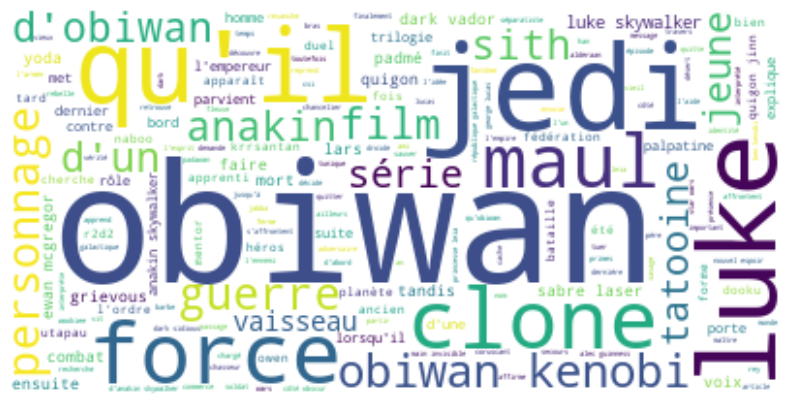

In [10]:
# Instancier le WordCloud avec les paramètres
wd = WordCloud(
    stopwords=fr_stop,
    background_color="white",     # Couleur de fond
    contour_width=1,              # Largeur du contour
    contour_color="steelblue",    # Couleur du contour
)

# Générer le WordCloud
cloud = wd.generate(doc.text)

# Afficher le WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")  # Supprimer les axes
plt.show()

We would need to have a corpus of lemmatized words, recreate a corpus of lemmatized words and visualize your new word cloud

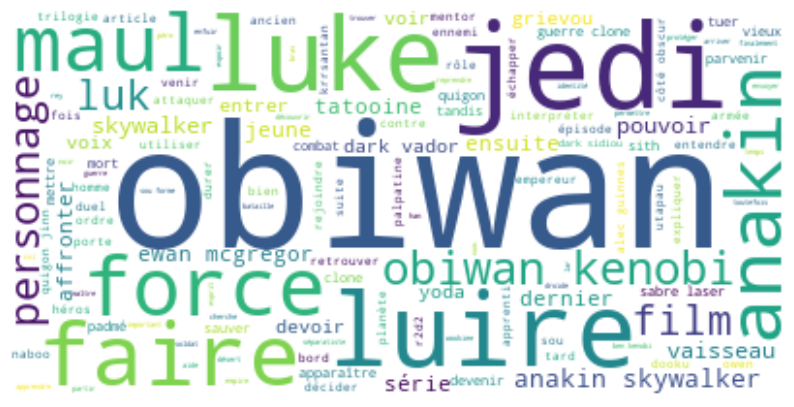

In [11]:
# Lemmatisation et suppression des stop words
lemma = [token.lemma_ for token in doc if token.lemma_.lower() not in fr_stop]

# Créer un nouveau corpus basé sur les lemmes
corpus_lemma = " ".join(lemma)

# Instancier le WordCloud
wd = WordCloud(
    background_color="white",
    contour_width=1,
    contour_color="steelblue",
    stopwords=fr_stop
)

# Générer le WordCloud à partir du corpus lemmatisé
cloud = wd.generate(corpus_lemma)

# Visualiser le WordCloud
plt.figure(figsize=(10, 10))
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Let's push analysis further! Some words are really common in our corpus, find which of them

In [12]:
# Créer une série Pandas à partir des lemmes
lemmadf = pd.Series(lemma)

# Calculer la fréquence des lemmes et créer un masque pour les termes fréquents
common = lemmadf.value_counts() > 15

# Appliquer le masque pour conserver uniquement les termes fréquents
common = common[common]

# Visualiser les 10 premiers termes fréquents
print("Les 10 termes fréquents :")
print(common[:10])

Les 10 termes fréquents :
obiwan       True
             True
jedi         True
luire        True
luke         True
anakin       True
skywalker    True
faire        True
kenobi       True
force        True
Name: count, dtype: bool


Update your list of stop words with the common words

In [13]:
# Update stop words 
new_stop_words = common.index

# Create a union of sets 
STOP_WORDS_updated = fr_stop.union(new_stop_words)

Create a new word cloud

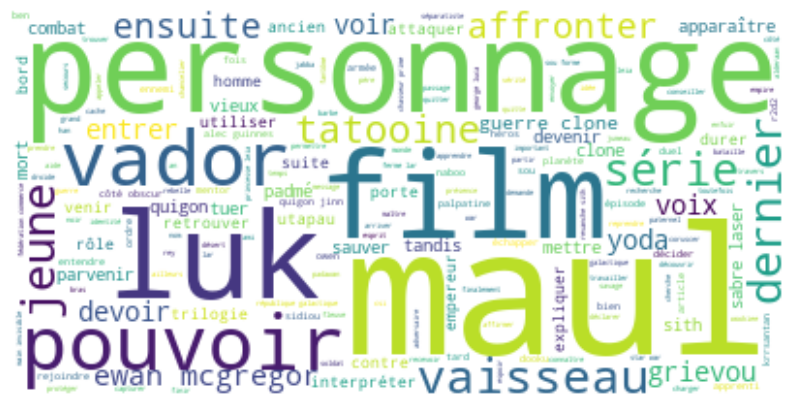

In [14]:
# Créer le WordCloud
wd = WordCloud(
    background_color="white",        # Couleur de fond
    contour_width=1,                 # Largeur des contours
    contour_color="steelblue",       # Couleur des contours
    stopwords=STOP_WORDS_updated     # Mots à exclure
)

# Générer le WordCloud à partir du corpus lemmatisé
cloud = wd.generate(corpus_lemma)

# Visualiser le WordCloud
plt.figure(figsize=(10, 10))        # Taille de la figure
plt.imshow(cloud, interpolation="bilinear")
plt.axis("off")                     # Supprimer les axes
plt.show()

We will now start building a tf-idf matrix. Let's first create a DataFrame containing our lemmatized corpus without the updated stop words.

In [15]:
# Lemmatization
lemma = [token.lemma_ for token in doc if token.lemma_ not in fr_stop]

# Créer un nouveau corpus basé sur les lemmes
corpus_lemma = " ".join(lemma)

# Créer une Series avec un seul document
corpus_series = pd.Series(corpus_lemma)

# Inclure la Series dans un DataFrame pour des manipulations simplifiées
corpus_df = pd.DataFrame(corpus_series, columns=["documents"])

# Afficher le DataFrame
corpus_df

,documents
0,article homonyme voir obiwan kenobi homonymie ...


Let's create now a TF-IDF matrix using sklearn

In [16]:
# Initialiser le TfidfVectorizer
vectorizer = TfidfVectorizer()

# Appliquer le TF-IDF sur la colonne 'documents'
X = vectorizer.fit_transform(corpus_df['documents'])

# Convertir en tableau dense
dense = X.toarray()
dense

array([[0.00642493, 0.00642493, 0.00642493, ..., 0.00642493, 0.01284985,
        0.01284985]])

Visualize most important words using seaborn, matplotlib or plotly

Help: You can create a dataframe, transpose it and then easily create a visualization

In [17]:
# Afficher les résultats sous forme de DataFrame pour plus de lisibilité
tfidf_df = pd.DataFrame(dense, columns=vectorizer.get_feature_names_out())
print(tfidf_df)

         11       136       179       182        19      2000  20004142  \
0  0.006425  0.006425  0.006425  0.006425  0.006425  0.006425  0.006425   

       2004      2014      2016  ...  émission    épique   épisode   épreuve  \
0  0.006425  0.006425  0.006425  ...   0.01285  0.006425  0.032125  0.006425   

   équilibre   étoile  étouffer    évader  évènement    œuvre  
0   0.006425  0.01285  0.006425  0.006425    0.01285  0.01285  

[1 rows x 1100 columns]


In [18]:
# Transpose dataframe
tfidf_df = tfidf_df.T

# Create a new token column 
tfidf_df["token"] = tfidf_df.index

tfidf_df

,0,token
11,0.006425,11
136,0.006425,136
179,0.006425,179
182,0.006425,182
19,0.006425,19
...,...,...
étoile,0.012850,étoile
étouffer,0.006425,étouffer
évader,0.006425,évader
évènement,0.012850,évènement


In [19]:
# Sort the top 15 values by descending order
tfidf_df.sort_values(by=0, ascending=False)[:15]

,0,token
obiwan,0.706742,obiwan
jedi,0.218447,jedi
luire,0.167048,luire
anakin,0.160623,anakin
luke,0.160623,luke
skywalker,0.134923,skywalker
faire,0.115649,faire
kenobi,0.115649,kenobi
dark,0.102799,dark
force,0.102799,force


In [22]:
# Create bar chart
fig = px.bar(tfidf_df.sort_values(by=0, ascending=False)[:15], x="token", y=0)

# Render chart
fig.show()